# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente.

## Imports
** Importe pandas, numpy, matplotlib,e seaborn. Em seguida, configure% matplotlib inline
(Você importará sklearn conforme você precisar). **

In [181]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')
%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [182]:
clientes = pd.read_csv("Ecommerce Customers.csv")

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [183]:
clientes.shape

(500, 8)

In [184]:
clientes.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [185]:
round(clientes.describe(),2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [186]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Análise de dados exploratória

** Vamos explorar os dados! **

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
** Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? **

In [187]:
def joint_corr(x, y, kind='scatter'):
    chart = sns.jointplot(x, y, kind=kind)
    chart.annotate(stats.pearsonr)
    return(plt.show)

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<function matplotlib.pyplot.show(*args, **kw)>

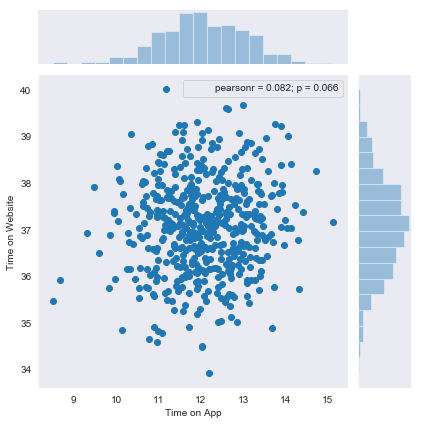

In [188]:
joint_corr(clientes['Time on App'],
          clientes['Time on Website'])

** Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso. **

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<function matplotlib.pyplot.show(*args, **kw)>

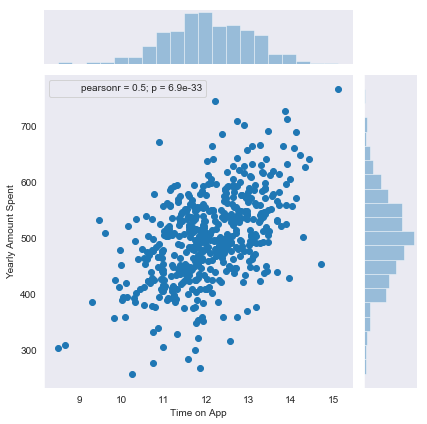

In [189]:
joint_corr(clientes['Time on App'], 
           clientes['Yearly Amount Spent'])

** Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<function matplotlib.pyplot.show(*args, **kw)>

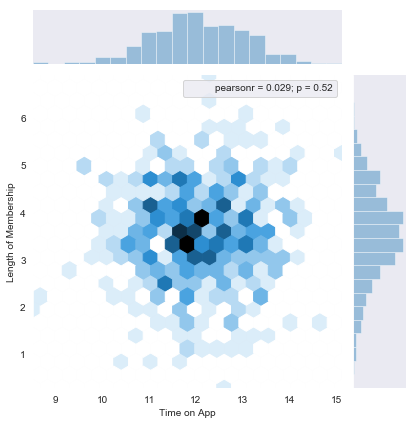

In [190]:
joint_corr(clientes['Time on App'], 
               clientes['Length of Membership'], 
               kind='hex')

** Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores) **

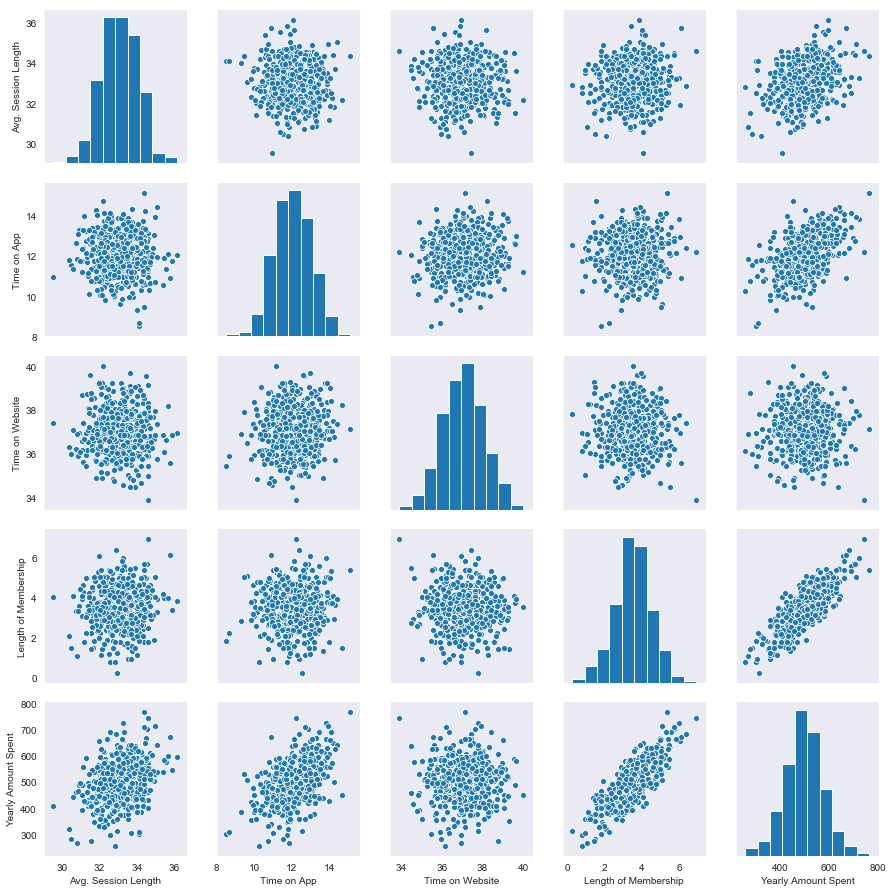

In [193]:
sns.pairplot(clientes)

** Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)? **

In [194]:
# lenght of the membership

** Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

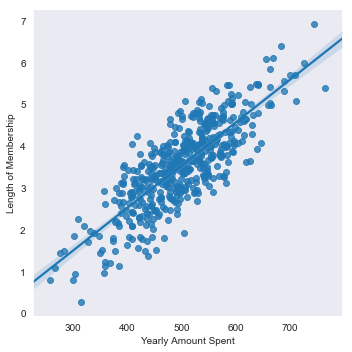

In [195]:
sns.lmplot('Yearly Amount Spent', 'Length of Membership', data=clientes)
plt.show()

In [196]:
corr, _ = stats.pearsonr(clientes['Yearly Amount Spent'], clientes['Length of Membership'])
corr

0.809083568247581

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
** Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). **

In [197]:
# select numeric variables
n_clients = clientes.select_dtypes(include='float')

In [198]:
n_clients.head(1)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054


In [199]:
X = n_clients.iloc[:, 0:4]

In [200]:
y = n_clients.iloc[:, -1]

** Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101 **

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=101)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

** Importe LinearRegression do sklearn.linear_model **

In [203]:
from sklearn.linear_model import LinearRegression

** Crie uma instância de um modelo LinearRegression () chamado lm. **

In [204]:
lm = LinearRegression()

** Treine lm nos dados de treinamento. **

In [205]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print os coeficientes do modelo**

In [206]:
lm.coef_

array([26.06944865, 38.67556383,  0.2518291 , 61.31057149])

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use lm.predict () para prever o conjunto X_test dos dados. **

In [207]:
y_pred = lm.predict(X_test)

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

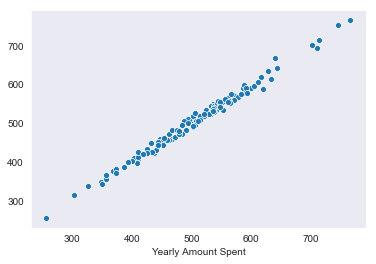

In [208]:
sns.scatterplot(y_test, y_pred)

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [209]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [210]:
def erro_lm(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    df_error = pd.DataFrame([MAE, MSE, RMSE])
    df_error.columns = ['errors']
    return(df_error)

In [211]:
erro_lm(y_test, y_pred)

,errors
0,7.419687
1,83.474182
2,9.136421


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

** Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). **

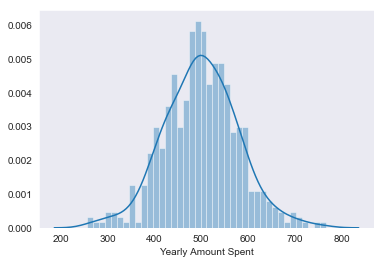

In [212]:
sns.distplot(clientes['Yearly Amount Spent'], bins=40)

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [213]:
coefs = pd.DataFrame(lm.coef_)
coefs.index = X.columns
coefs.columns = ['Coefs']
coefs.sort_values('Coefs', ascending=False, inplace=True)

In [214]:
coefs

,Coefs
Length of Membership,61.310571
Time on App,38.675564
Avg. Session Length,26.069449
Time on Website,0.251829


** Como você pode interpretar esses coeficientes? **

** Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site? **